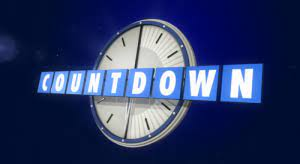
## Countdown numbers Game


The numbers game in the TV program Countdown challenges contestants to solve mathematical puzzles using a set of six random numbers. This game, popularized on the show, involves selecting two copies of integers from 1 to 10 and one copy each of the numbers 25, 50, 75, and 100. Additionally, a target number is randomly generated between 101 and 999. Contestants have a time limit of 30 seconds to employ basic arithmetic operations (addition, subtraction, multiplication, and division) on the given numbers to reach the target number. The key constraints include using each of the six numbers only once and ensuring that division results in a whole number, while subtraction yields positive results.

To tackle this computational challenge we will crearte Python function, named solve_numbers, capable of finding a solution or returning None if none exists. The assessment evaluates the theoretical understanding of the game's computational complexity, the practical implementation of the solution function The numbers game serves as a practical application of computational theory, testing contestants' ability to devise algorithms and strategies to reach a specific numerical goal efficiently.
***

### Start with the Given Numbers:

Begin with the list of N numbers provided in the game.
Select Two Numbers:

Pick any two numbers from the list.
Perform All Possible Operations:

Apply all basic mathematical operations (addition, subtraction, multiplication, division) to the selected pair of numbers.
Note down the results.
Update the List:

Replace the two selected numbers with the results obtained in the previous step.
Update the list of numbers.
Repeat Steps 2-4:

Repeat the process by selecting two numbers from the updated list and performing all possible operations.
Continue this process until you find a combination that equals the target number or until all possible combinations have been exhausted.
Note Possible Solutions:

If, at any point, you obtain the target number, note down the sequence of operations that led to it. This is a possible solution.
Backtrack and Try Other Combinations:

If a selected pair of numbers and operations do not lead to the target, backtrack and try other combinations.
Continue exploring different combinations until all possibilities are exhausted.
Optimizations:

You can optimize the process by keeping track of previously calculated results and avoiding redundant calculations.
End Conditions:

The process ends when you find a solution or when all possible combinations have been tried.

***

The original Countdown Numbers Game solver adheres to the rules of the TV Countdown game show, where six natural integer tiles are used. The allowed operations include addition (+), subtraction (-), multiplication (*), and division (/), with the constraint that divisions should result in whole numbers.

For example, given the task of finding 123 with the numbers 4, 5, 6, 7, 8, and 9, the solver systematically explores combinations through operations like addition, subtraction, multiplication, and division, ensuring that only integer results are considered. The goal is to reach the target number using each of the given numbers exactly once.

On the other hand, the advanced solver provides additional options, allowing users to set constraints on operators, specify the number of operations, and even generate a list of all possible results using given numbers. This solver offers greater flexibility and control over the solving process.

As an illustration, finding 24 with the numbers 5, 5, 5, and 1 may involve non-integer values in the operations. For instance, 1 divided by 5 equals 0.2, then subtracting 0.2 from 5 gives 4.8, and finally, multiplying 5 by 4.8 results in 24.

The N-Numbers solver extends the original rules to handle any quantity of numbers. It attempts to find a solution to a randomly generated problem, but the calculation process can be extensive, potentially involving billions of iterations. If no solution exists, the solver may continue indefinitely without reaching an answer.
***

# Refrence 
https://www.dcode.fr/countdown-numbers-game

## Reverse Polish Notation

Reverse Polish Notation (RPN) is a mathematical expression format that eliminates the need for brackets and follows a postfix notation, where operators are placed after their operands. The key advantage of RPN is its simplicity in evaluation using a stack-based algorithm

### Benefits of RPN:
#### No Need for Brackets:
RPN eliminates the need for brackets in expressions, ensuring unambiguous representation without the reliance on operator precedence.

#### Simple Evaluation Algorithm:
RPN expressions can be evaluated using a straightforward stack-based algorithm, requiring only a single pass from left to right.

## Evaluation Algorithm and Stack:
### Stack Operations:

#### Push numbers onto the stack.
Pop numbers from the stack when an operator is encountered, perform the operation, and push the result back onto the stack.
Algorithm Steps:

#### Read the RPN expression from left to right.
If a number is encountered, push it onto the stack.
If an operator is encountered, pop the required number of operands from the stack, perform the operation, and push the result back onto the stack.

In [3]:
def evaluate_rpn(expression):
    stack = []
    operators = {'+': lambda x, y: x + y, '-': lambda x, y: x - y, '*': lambda x, y: x * y, '/': lambda x, y: x / y}

    for token in expression:
        if token.isdigit() or (token[0] == '-' and token[1:].isdigit()):
            stack.append(float(token))
        elif token in operators:
            operand2, operand1 = stack.pop(), stack.pop()
            result = operators[token](operand1, operand2)
            stack.append(result)

    return stack[0]

# Example Usage:
rpn_expression = ["5", "4", "+", "9", "*", "6", "3", "-", "/"]
result = evaluate_rpn(rpn_expression)
print("Result:", result)


Result: 27.0


### Valid RPN Expressions:
Valid RPN expressions have one more operand than operators. The stack algorithm requires at least two numbers on the stack when an operator is encountered and exactly one number on the stack at the end of the expression.

### Evaluation Trees:
RPN expressions can be visualized as evaluation trees, where operators are internal vertices and numbers are leaves. The tree is built based on the order of operations.

In summary, RPN provides a concise and easily computable representation of mathematical expressions, making it a valuable notation in certain applications.

#### Refrences
https://docs.python.org/



In [1]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None


def build_evaluation_tree(expression):
    stack = []

    operators = set(['+', '-', '*', '/'])

    for token in expression:
        if token not in operators:
            node = Node(token)
            stack.append(node)
        else:
            if len(stack) < 2:
                raise ValueError("Invalid RPN expression")

            right_operand = stack.pop()
            left_operand = stack.pop()

            operator_node = Node(token)
            operator_node.left = left_operand
            operator_node.right = right_operand

            stack.append(operator_node)

    if len(stack) != 1:
        raise ValueError("Invalid RPN expression")

    return stack[0]


def evaluate_tree(node):
    if node.value.isdigit() or (node.value[0] == '-' and node.value[1:].isdigit()):
        return int(node.value)
    
    left_value = evaluate_tree(node.left)
    right_value = evaluate_tree(node.right)

    if node.value == '+':
        return left_value + right_value
    elif node.value == '-':
        return left_value - right_value
    elif node.value == '*':
        return left_value * right_value
    elif node.value == '/':
        if right_value == 0:
            raise ValueError("Division by zero")
        return left_value / right_value


def evaluate_rpn(expression):
    root = build_evaluation_tree(expression)
    result = evaluate_tree(root)
    return result


# Example usage:
rpn_expression = ["3", "4", "+", "2", "*"]
result = evaluate_rpn(rpn_expression)
print(f"Result of RPN expression {rpn_expression} is: {result}")


Result of RPN expression ['3', '4', '+', '2', '*'] is: 14
